In [3]:
import os
os.chdir("florence_model_comparison_visualisation")
os.listdir()

['trash_percentage_50_text_encoder_florence2_base_attention_map_tensor.pt',
 'trash_percentage_50_vision_florence2_base_attention_map_tensor.pt',
 'trash_percentage_50_vision_florence2_large_attention_map_tensor.pt',
 'fan_percentage_50_text_encoder_florence2_base_attention_map_tensor.pt',
 'fan_percentage_50_vision_florence2_large_attention_map_tensor.pt',
 'comparison.ipynb',
 'trash_percentage_50_text_encoder_florence2_large_attention_map_tensor.pt',
 'fan_percentage_50_text_decoder_florence2_base_attention_map_tensor.pt',
 'fan_percentage_50_vision_florence2_base_attention_map_tensor.pt',
 'trash_percentage_50_text_decoder_florence2_large_attention_map_tensor.pt',
 'fan_percentage_50_text_encoder_florence2_large_attention_map_tensor.pt',
 'fan_percentage_50_text_decoder_florence2_large_attention_map_tensor.pt',
 'trash_percentage_50_text_decoder_florence2_base_attention_map_tensor.pt']

In [5]:
import torch 

base_model_tensors = {
    'fan':{
        'vision': torch.load('fan_percentage_50_vision_florence2_base_attention_map_tensor.pt'),
        'self-attn': torch.load('fan_percentage_50_text_encoder_florence2_base_attention_map_tensor.pt'),
        'cross-attn': torch.load('fan_percentage_50_text_decoder_florence2_base_attention_map_tensor.pt')
    },
    'trash':{
        'vision': torch.load('trash_percentage_50_vision_florence2_base_attention_map_tensor.pt'),
        'self-attn': torch.load('trash_percentage_50_text_encoder_florence2_base_attention_map_tensor.pt'),
        'cross-attn': torch.load('trash_percentage_50_text_decoder_florence2_base_attention_map_tensor.pt')
    }
}

/tmp/ipykernel_7899/2802633308.py:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  'vision': torch.load('fan_percentage_50_vision_florence2_base_attention_map_tensor.pt'),
/

In [6]:
large_model_tensors = {
    'fan':{
        'vision': torch.load('fan_percentage_50_vision_florence2_large_attention_map_tensor.pt'),
        'self-attn': torch.load('fan_percentage_50_text_encoder_florence2_large_attention_map_tensor.pt'),
        'cross-attn': torch.load('fan_percentage_50_text_decoder_florence2_large_attention_map_tensor.pt')
    },
    'trash':{
        'vision': torch.load('trash_percentage_50_vision_florence2_large_attention_map_tensor.pt'),
        'self-attn': torch.load('trash_percentage_50_text_encoder_florence2_large_attention_map_tensor.pt'),
        'cross-attn': torch.load('trash_percentage_50_text_decoder_florence2_large_attention_map_tensor.pt')
    }
}

/tmp/ipykernel_7899/1391189579.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  'vision': torch.load('fan_percentage_50_vision_florence2_large_attention_map_tensor.pt'),


In [7]:
base_model_tensors['fan']['vision'].shape, base_model_tensors['fan']['self-attn'].shape, base_model_tensors['fan']['cross-attn'].shape

(torch.Size([1, 9216, 256]),
 torch.Size([1, 584, 768]),
 torch.Size([3, 1, 768]))

In [8]:
large_model_tensors['fan']['vision'].shape, large_model_tensors['fan']['self-attn'].shape, large_model_tensors['fan']['cross-attn'].shape

(torch.Size([1, 9216, 512]),
 torch.Size([1, 584, 1024]),
 torch.Size([3, 1, 1024]))

In [10]:
!pip install umap-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 62.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.4/42.4 MB 60.6 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: pip install --upgrade pip


In [11]:
import torch

# Assuming your tensor is named 'data_tensor'
data = base_model_tensors['fan']['vision'].squeeze(0)  # Removes the first dimension [1, 9216, 256] → [9216, 256]

# If the tensor is on GPU, move to CPU and convert to NumPy
data_np = data.cpu().detach().numpy()

In [12]:
import umap.umap_ as umap

# Initialize UMAP reducer (customize parameters if needed)
reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2)

# Fit UMAP to the data and transform to 2D
embedding = reducer.fit_transform(data_np)

/opt/conda/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_np)
embedding = reducer.fit_transform(data_scaled)  # Use scaled data

/opt/conda/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


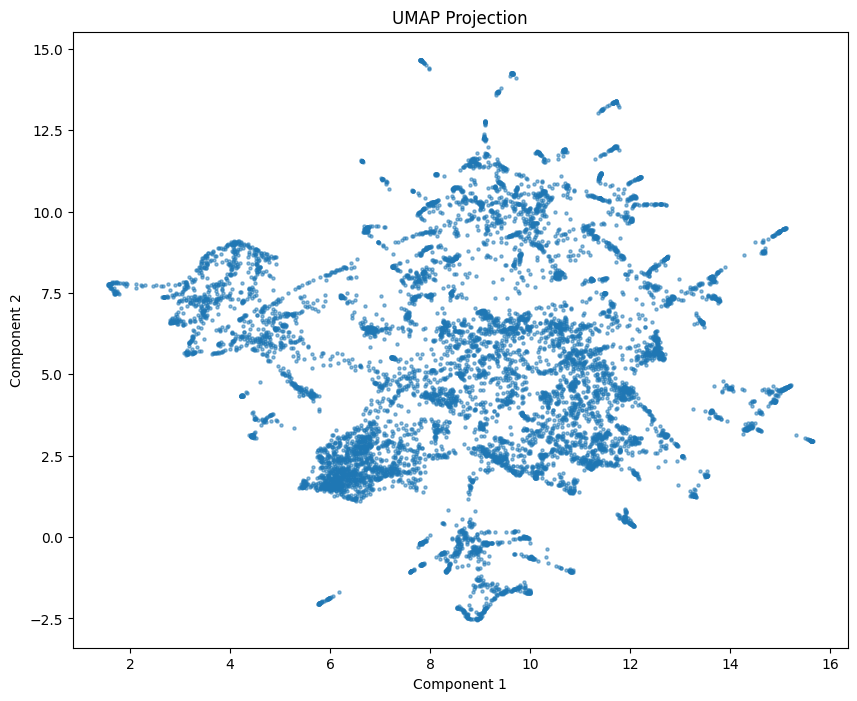

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.scatter(embedding[:, 0], embedding[:, 1], s=5, alpha=0.5)
plt.title("UMAP Projection")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.show()

---

In [15]:
import torch
import umap.umap_ as umap

def reduce_to_2d_umap(data_tensor, **umap_kwargs):
    """
    Converts a PyTorch tensor to a 2D UMAP embedding.
    
    Args:
        data_tensor: Input tensor with shape [batch_size, num_samples, num_features]
                     (batch_size should be 1)
        **umap_kwargs: Optional UMAP parameters (e.g., n_neighbors, min_dist)
    
    Returns:
        numpy.ndarray: 2D embedding with shape [num_samples, 2]
    """
    # Remove batch dimension and convert to NumPy
    data_np = data_tensor.squeeze(0).cpu().detach().numpy()
    
    # Force 2D output (override any n_components argument)
    umap_kwargs.pop('n_components', None)
    
    # Create and fit UMAP reducer
    reducer = umap.UMAP(n_components=2, **umap_kwargs)
    embedding = reducer.fit_transform(data_np)
    
    return embedding

In [19]:
# Assuming your tensor is named `input_tensor` with shape [1, 9216, 256]
embedding_2d_base = reduce_to_2d_umap(
    base_model_tensors['fan']['vision'], 
    n_neighbors=20,  # Example custom parameter
    min_dist=0.1     # Another example parameter
)

embedding_2d_large = reduce_to_2d_umap(
    large_model_tensors['fan']['vision'], 
    n_neighbors=20,  # Example custom parameter
    min_dist=0.1     # Another example parameter
)

# # To plot (requires matplotlib):
# import matplotlib.pyplot as plt
# plt.scatter(embedding_2d[:, 0], embedding_2d[:, 1], s=2)
# plt.show()

/opt/conda/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [25]:
import matplotlib.pyplot as plt

def plot_embeddings_2d(embedding1, embedding2, 
                       labels=('Base Model', 'Large Model'),
                       colors=('blue', 'red'), 
                       alpha=0.5, s=5, figsize=(12, 8),
                       title='UMAP Projection Comparison'):
    """
    Plots two 2D embeddings in the same scatter plot with different colors.
    
    Args:
        embedding1: First 2D embedding should be from base model 
        embedding2: Second 2D embedding should be from large model 
        labels: Tuple of legend labels (default: ('Base Model', 'Large Model'))
        colors: Tuple of colors for each embedding (default: ('blue', 'red'))
        alpha: Transparency of points (0-1, default: 0.5)
        s: Marker size (default: 5)
        figsize: Figure size (default: (12, 8))
        title: Plot title (default: 'UMAP Projection Comparison')
    """
    plt.figure(figsize=figsize)
    
    # Plot first embedding
    plt.scatter(embedding1[:, 0], embedding1[:, 1], 
                c=colors[0], label=labels[0], 
                alpha=alpha, s=s)
    
    # Plot second embedding
    plt.scatter(embedding2[:, 0], embedding2[:, 1], 
                c=colors[1], label=labels[1], 
                alpha=alpha, s=s)
    
    plt.title(title)
    plt.xlabel('UMAP Dimension 1')
    plt.ylabel('UMAP Dimension 2')
    plt.legend(markerscale=2)  # Make legend markers larger than points
    plt.show()

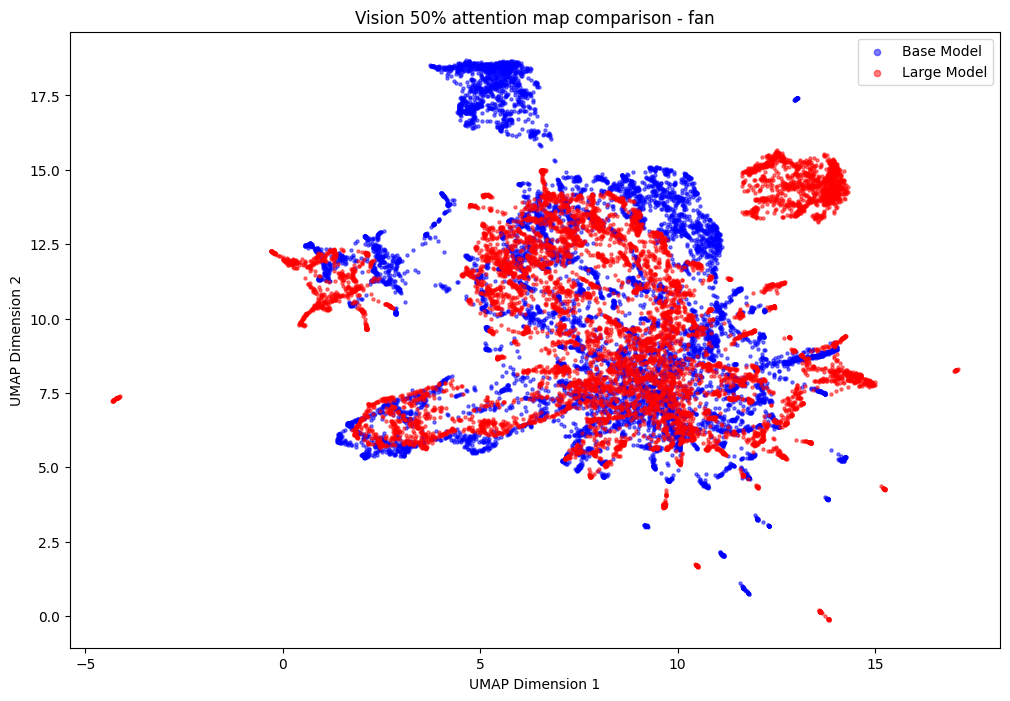

In [26]:
plot_embeddings_2d(embedding_2d_base, embedding_2d_large, title=r'Vision 50% attention map comparison - fan')

/opt/conda/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


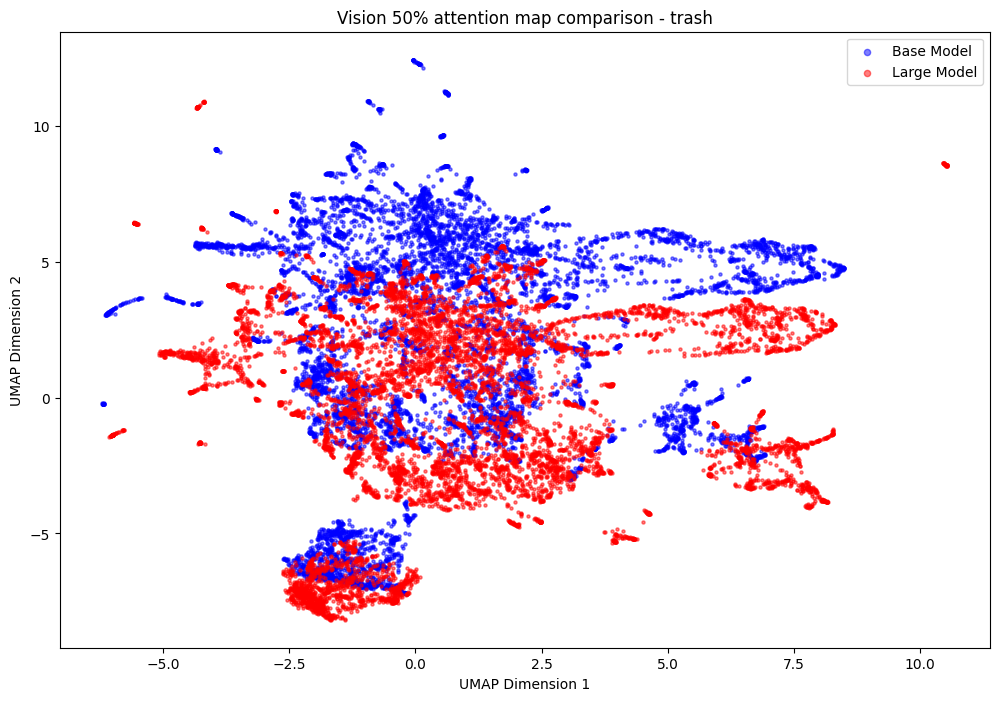

In [31]:
# Assuming your tensor is named `input_tensor` with shape [1, 9216, 256]
embedding_2d_base = reduce_to_2d_umap(
    base_model_tensors['trash']['vision'], 
    n_neighbors=20,  # Example custom parameter
    min_dist=0.1     # Another example parameter
)

embedding_2d_large = reduce_to_2d_umap(
    large_model_tensors['trash']['vision'], 
    n_neighbors=20,  # Example custom parameter
    min_dist=0.1     # Another example parameter
)

# # To plot (requires matplotlib):
# import matplotlib.pyplot as plt
# plt.scatter(embedding_2d[:, 0], embedding_2d[:, 1], s=2)
# plt.show()

plot_embeddings_2d(embedding_2d_base, embedding_2d_large, title=r'Vision 50% attention map comparison - trash')

/opt/conda/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


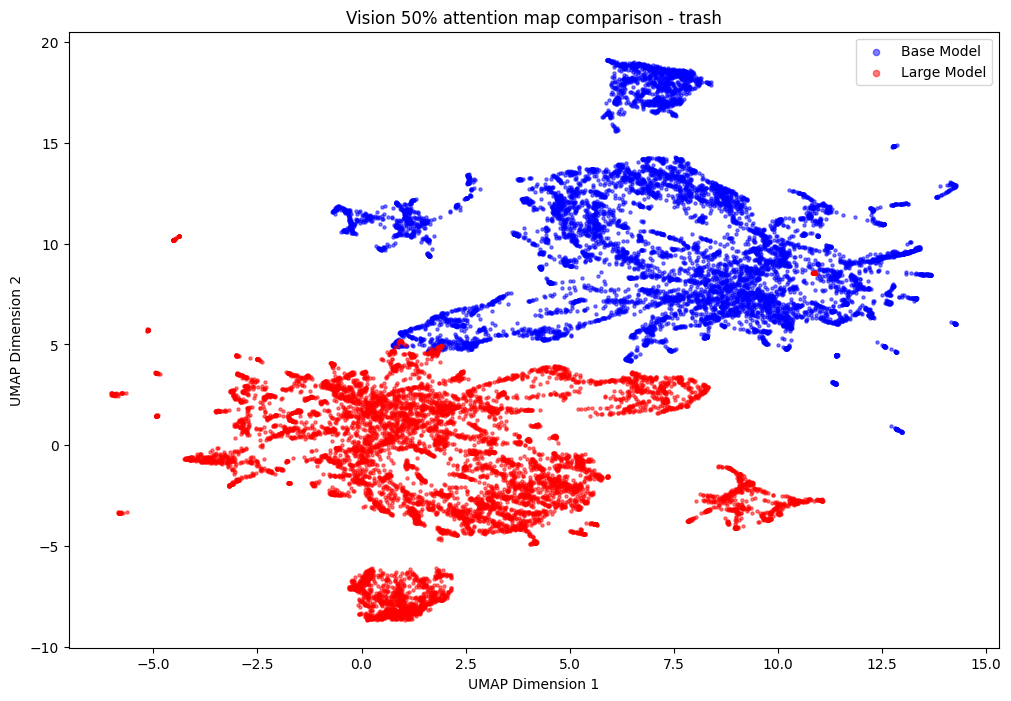

In [36]:
# Assuming your tensor is named `input_tensor` with shape [1, 9216, 256]
embedding_2d_base = reduce_to_2d_umap(
    base_model_tensors['trash']['vision'], 
    n_neighbors=20,  # Example custom parameter
    min_dist=0.1     # Another example parameter
)

embedding_2d_large = reduce_to_2d_umap(
    large_model_tensors['trash']['vision'], 
    n_neighbors=20,  # Example custom parameter
    min_dist=0.1     # Another example parameter
)

# # To plot (requires matplotlib):
# import matplotlib.pyplot as plt
# plt.scatter(embedding_2d[:, 0], embedding_2d[:, 1], s=2)
# plt.show()

plot_embeddings_2d(embedding_2d_base, embedding_2d_large, title=r'Vision 50% attention map comparison - trash')

## Self-attension maps

/opt/conda/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


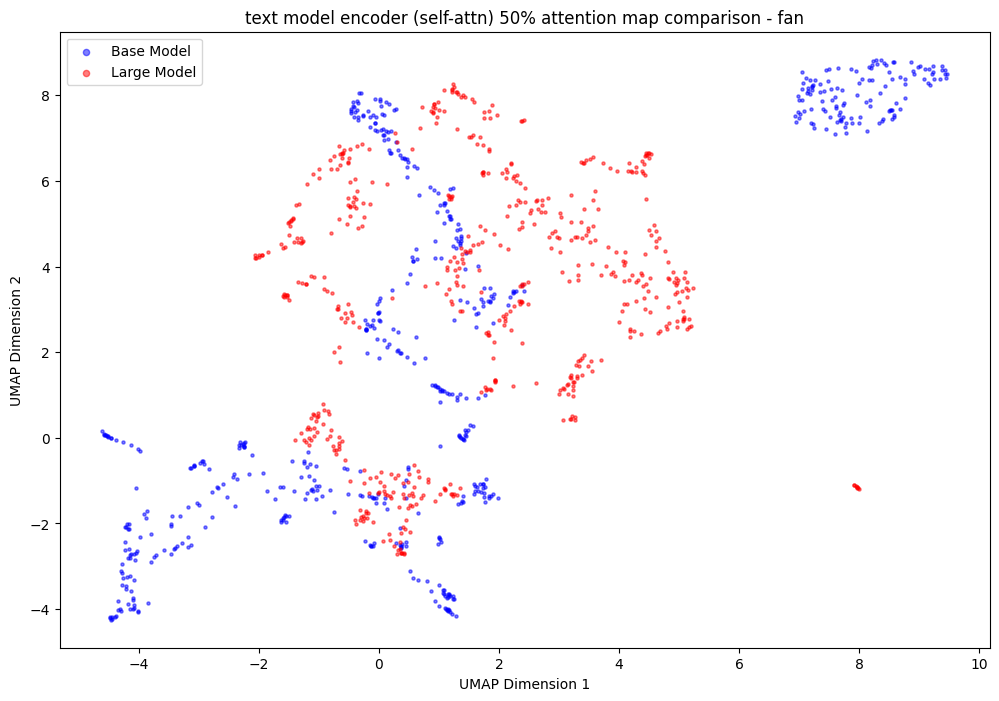

In [32]:
# Assuming your tensor is named `input_tensor` with shape [1, 9216, 256]
embedding_2d_base = reduce_to_2d_umap(
    base_model_tensors['fan']['self-attn'], 
    n_neighbors=20,  # Example custom parameter
    min_dist=0.1     # Another example parameter
)

embedding_2d_large = reduce_to_2d_umap(
    large_model_tensors['fan']['self-attn'], 
    n_neighbors=20,  # Example custom parameter
    min_dist=0.1     # Another example parameter
)

# # To plot (requires matplotlib):
# import matplotlib.pyplot as plt
# plt.scatter(embedding_2d[:, 0], embedding_2d[:, 1], s=2)
# plt.show()

plot_embeddings_2d(embedding_2d_base, embedding_2d_large, title=r'text model encoder (self-attn) 50% attention map comparison - fan')

/opt/conda/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


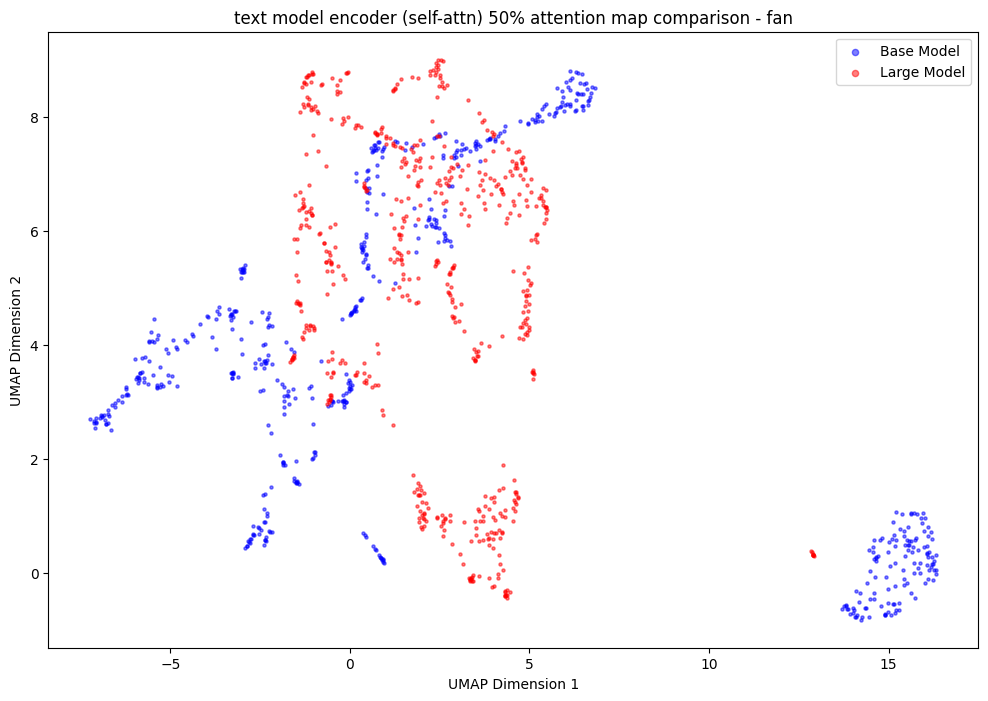

In [33]:
# Assuming your tensor is named `input_tensor` with shape [1, 9216, 256]
embedding_2d_base = reduce_to_2d_umap(
    base_model_tensors['fan']['self-attn'], 
    n_neighbors=20,  # Example custom parameter
    min_dist=0.1     # Another example parameter
)

embedding_2d_large = reduce_to_2d_umap(
    large_model_tensors['fan']['self-attn'], 
    n_neighbors=20,  # Example custom parameter
    min_dist=0.1     # Another example parameter
)

# # To plot (requires matplotlib):
# import matplotlib.pyplot as plt
# plt.scatter(embedding_2d[:, 0], embedding_2d[:, 1], s=2)
# plt.show()

plot_embeddings_2d(embedding_2d_base, embedding_2d_large, title=r'text model encoder (self-attn) 50% attention map comparison - fan')

/opt/conda/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


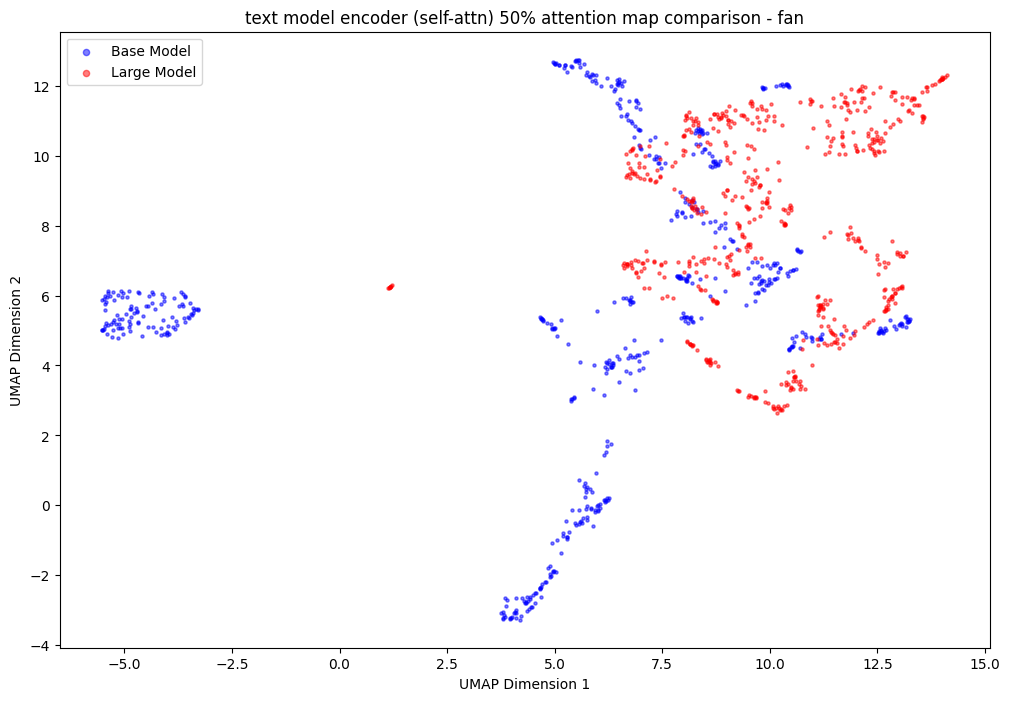

In [35]:
# Assuming your tensor is named `input_tensor` with shape [1, 9216, 256]
embedding_2d_base = reduce_to_2d_umap(
    base_model_tensors['trash']['self-attn'], 
    n_neighbors=20,  # Example custom parameter
    min_dist=0.1     # Another example parameter
)

embedding_2d_large = reduce_to_2d_umap(
    large_model_tensors['trash']['self-attn'], 
    n_neighbors=20,  # Example custom parameter
    min_dist=0.1     # Another example parameter
)

# # To plot (requires matplotlib):
# import matplotlib.pyplot as plt
# plt.scatter(embedding_2d[:, 0], embedding_2d[:, 1], s=2)
# plt.show()

plot_embeddings_2d(embedding_2d_base, embedding_2d_large, title=r'text model encoder (self-attn) 50% attention map comparison - fan')

### Cross Attention

In [39]:
base_model_tensors['fan']['cross-attn'].shape

torch.Size([3, 1, 768])

In [38]:
base_model_tensors['fan']['cross-attn'][0].shape

torch.Size([1, 768])

In [34]:
# Assuming your tensor is named `input_tensor` with shape [1, 9216, 256]
embedding_2d_base = reduce_to_2d_umap(
    base_model_tensors['fan']['cross-attn'], 
    n_neighbors=20,  # Example custom parameter
    min_dist=0.1     # Another example parameter
)

embedding_2d_large = reduce_to_2d_umap(
    large_model_tensors['fan']['cross-attn'], 
    n_neighbors=20,  # Example custom parameter
    min_dist=0.1     # Another example parameter
)

# # To plot (requires matplotlib):
# import matplotlib.pyplot as plt
# plt.scatter(embedding_2d[:, 0], embedding_2d[:, 1], s=2)
# plt.show()

plot_embeddings_2d(embedding_2d_base, embedding_2d_large, title=r'text model decoder (cross-attn) 50% attention map comparison - fan')

/opt/conda/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


ValueError: Found array with dim 3. None expected <= 2.

In [ ]:
# Assuming your tensor is named `input_tensor` with shape [1, 9216, 256]
embedding_2d_base = reduce_to_2d_umap(
    base_model_tensors['fan']['self-attn'], 
    n_neighbors=20,  # Example custom parameter
    min_dist=0.1     # Another example parameter
)

embedding_2d_large = reduce_to_2d_umap(
    large_model_tensors['fan']['self-attn'], 
    n_neighbors=20,  # Example custom parameter
    min_dist=0.1     # Another example parameter
)

# # To plot (requires matplotlib):
# import matplotlib.pyplot as plt
# plt.scatter(embedding_2d[:, 0], embedding_2d[:, 1], s=2)
# plt.show()

plot_embeddings_2d(embedding_2d_base, embedding_2d_large, title=r'text model encoder (self-attn) 50% attention map comparison - fan')

---

In [9]:
import torch
import umap
import matplotlib.pyplot as plt

def reduce_dimensions(tensor):
    # Ensure tensor is 2D (samples x features)
    if len(tensor.shape) > 2:
        tensor = tensor.squeeze(0)
    
    # Convert PyTorch tensor to NumPy array
    data_array = tensor.numpy()
    
    # Apply UMAP
    reducer = umap.UMAP(n_components=2, random_state=42)
    reduced_data = reducer.fit_transform(data_array)
    
    # Plot the reduced data
    plt.figure(figsize=(10, 8))
    plt.scatter(reduced_data[:, 0], reduced_data[:, 1], alpha=0.7)
    plt.title('UMAP Dimensionality Reduction')
    plt.xlabel('UMAP Dimension 1')
    plt.ylabel('UMAP Dimension 2')
    plt.tight_layout()
    plt.show()
    
    return reduced_data

# Example usage
tensor = base_model_tensors['fan']['vision']  # Your input tensor
reduced_embedding = reduce_dimensions(tensor)

ModuleNotFoundError: No module named 'umap'